#线性回归模型

现在，我们来做一些建模！我们从最简单的线性回归（Linear regression）开始。线性回归是最早的也是最基本的模型——把数据拟合成一条直线。

<!-- TEASER_END -->

##Getting ready

`boston`数据集很适合用来演示线性回归。`boston`数据集包含了波士顿地区的房屋价格中位数。还有一些可能会影响房价的因素，比如犯罪率（crime rate）。

首先，让我们加载数据：

In [1]:
from sklearn import datasets
boston = datasets.load_boston()

##How to do it...

实际上，用scikit-learn的线性回归非常简单，其API和前面介绍的模型一样。

首先，导入`LinearRegression`类创建一个对象：

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

现在，再把自变量和因变量传给`LinearRegression`的`fit`方法：

In [3]:
lr.fit(boston.data, boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

现在开始预测：

In [4]:
predictions = lr.predict(boston.data)

要看预测的效果，我们用预测值与实际值的残差（residuals）直方图分布来演示：

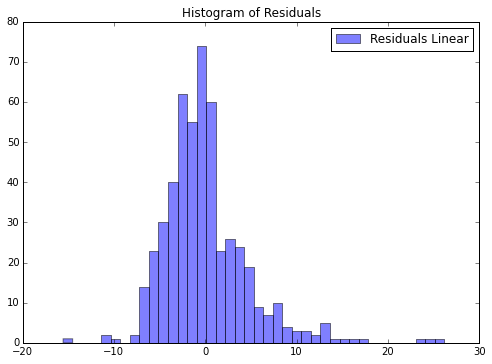

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(boston.target-predictions,bins=40, label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Histogram of Residuals")
ax.legend(loc='best');

让我们看看相关系数：

In [6]:
lr.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

>一个常用的特征与对应的相关系数的呈现方式是用`zip`函数（Python 2.x用`zip`，Python 3.x里`zip`返回生成器，必须用`list(zip(...))`），这里是`zip(boston.feature_names, lr.coef_)`。

In [7]:
list(zip(boston.feature_names, lr.coef_))

[('CRIM', -0.10717055656035571),
 ('ZN', 0.046395219529794252),
 ('INDUS', 0.020860239532177083),
 ('CHAS', 2.6885613993179542),
 ('NOX', -17.795758660309406),
 ('RM', 3.8047524602580065),
 ('AGE', 0.0007510617033257283),
 ('DIS', -1.4757587965198153),
 ('RAD', 0.30565503833909768),
 ('TAX', -0.012329346305270588),
 ('PTRATIO', -0.95346355469056121),
 ('B', 0.0093925127221890746),
 ('LSTAT', -0.52546663290078754)]

这样我们就可以看出哪个因素与因变量是负相关，哪个因素与因变量是正相关了。例如，上面的结果显示，波士顿地区的犯罪率与房价负相关。

##How it works...

线性回归的基本理念是找出满足$y=X\beta$的相关系数集合$\beta$，其中$X$是因变量数据矩阵。想找一组完全能够满足等式的相关系数很难，因此通常会增加一个误差项表示不精确程度或测量误差。因此，方程就变成了$y=X\beta+\epsilon$，其中$\epsilon$被认为是服从正态分布且与$X$独立的随机变量。用几何学的观点描述，就是说这个变量与$X$是正交的（perpendicular）。这超出了本书的范围，可以参考其他信息证明$E(X\epsilon)=0$。

为了找到相关系数集合$\beta$，我们最小化误差项，这转化成了残差平方和最小化问题。

这个问题可以用解析方法解决，其解是$\beta=(X^TX)^{-1}X^T \hat y$

###There's more...

`LinearRegression`对象可以自动标准正态化（normalize或scale）输入数据：

In [8]:
lr2 = LinearRegression(normalize=True)
lr2.fit(boston.data, boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [9]:
predictions2 = lr2.predict(boston.data)

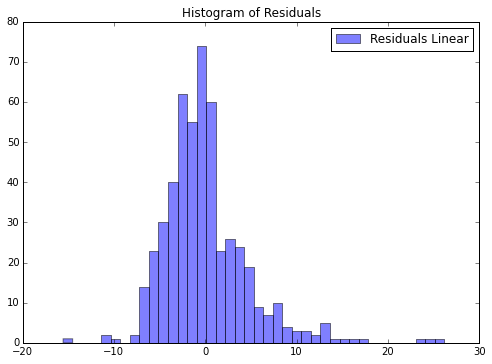

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(boston.target-predictions2,bins=40, label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Histogram of Residuals")
ax.legend(loc='best');

In [11]:
import numpy as np

In [14]:
np.percentile(boston.target-predictions2, [2.5, 99])

array([ -6.68134034,  15.32488183])

In [15]:
np.percentile(boston.target-predictions, [2.5, 99])

array([ -6.68134034,  15.32488183])

与前面的结果没有不同。